# I will use this notebook to do my math homework :-) 
###### below I will use Polish language

In [1]:
import numpy as np
import numpy.linalg as la
from PIL import Image
from matplotlib import pyplot as plt 
%matplotlib inline 

In [2]:
# Zadanie: policzyć iloczyn skalarny dla następujących dwóch wektorów:
# a = (3.2e8, 1, –1, 8.0e7) oraz b = (4.0e7, 1, –1, –1.6e8)

a = np.array([3.2e8, 1, -1, 8.0e7])
b = np.array([4.0e7, 1, -1, -1.6e8])

print(np.dot(a,b))
print(a.T @ b)

0.0
0.0


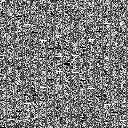

In [3]:
# Zadanie: Rozwiązać numerycznie dany układ równań - plik zewnętrzny. 
# Dane w pliku tekstowym są w formacie: kolumna pierwsza: n1, kolumna druga: n2, kolumna trzecia wi. 
# Każda i-ta linia to układ równań: xn1 +xn2 = wi. Linii jest 16384. 
# Wyniki tworzą wektor x0..x16383 lub jak kto woli x1...x16384. 
# Wynik przedstawić w postaci obrazka 128x128 punktów, gdzie x1...x128 (x0..x127) 
# tworzą pierwszy wiersz, itd. Dobrać odpowiednią skalę szarości.

# Wskazówka: zakładając, że jedna liczba zmiennoprzecinkowa zajmuje w pamięci 4B, 
#    odpowiednia macierz zajmie 1GB pamięci. 
#    Jej odwrócenie jest więc możliwe za pomocą typowego komputera PC ale dość trudne. 
#    Wygodniej będzie prawdopodobnie użyć bibioteki macierzy rzadkich. 
#    Macierz będzie w każdym wierszu zawierac dwie jedynki - poza tym same zera.
data = np.genfromtxt('uklad_rownan_spaces', dtype=float, delimiter=' ') 
n1, n2, wi = data.T
left = np.zeros((16384, 16384), dtype=np.int8)

for index, row in enumerate(data):
    left[index][int(row[0])] = 1
    left[index][int(row[1])] = 1
    
solution = np.linalg.solve(left, wi)

img = Image.fromarray( solution.reshape((128, 128)) , 'L')
img
#img.resize((512, 512))

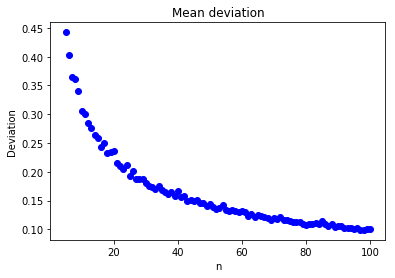

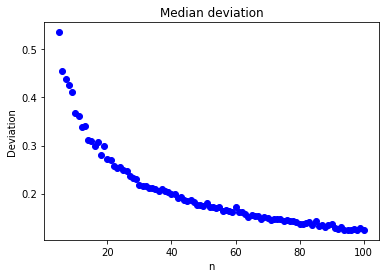

In [4]:
# 15(***) Wylosować n liczb z rozkłau normalnego o średnej 0 i odchyleniu
# standardowym 1. Policzyć średnią i medianę. Zapamiętać wyniki. Operacje
# powtórzyć 1000 razy. Policzyć odchylenia standardowe otzymanych średnich i
# median. Wykonać wykres otrzymanych odchyleń dla wszystkich całkowitych
# n, takich, że 4 < n < 101.

mean_dev = np.empty(101)
median_dev = np.empty(101)
for n in range(5, 101):
    mean = np.empty(1000)
    median = np.empty(1000)
    for m in range(0, 1000):
        random_numbers = np.random.normal(size=n)
        mean[m] = np.mean(random_numbers)
        median[m] = np.median(random_numbers)
        #print(np.mean(random_numbers))
    mean_dev[n] = np.std(mean)
    median_dev[n] = np.std(median)
    
x = np.arange(5,101) 
y = mean_dev[5::]
plt.title("Mean deviation") 
plt.xlabel("n") 
plt.ylabel("Deviation") 
plt.plot(x,y,"ob") 
plt.show()

y = median_dev[5::]
plt.title("Median deviation")
plt.xlabel("n") 
plt.ylabel("Deviation") 
plt.plot(x,y,"ob") 
plt.show()

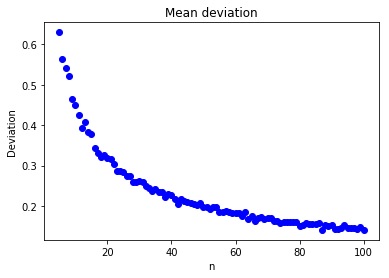

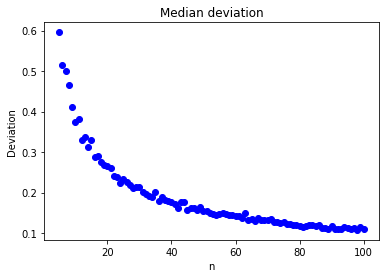

In [5]:
# Zadanie powtórzyć dla rozkłądu Laplace’a
# (https://en.wikipedia.org/wiki/Laplace distribution) o takiej samej śred-
# niej i odchyleniu standardowym jak poprzednio.

mean_dev = np.empty(101)
median_dev = np.empty(101)
for n in range(5, 101):
    mean = np.empty(1000)
    median = np.empty(1000)
    for m in range(0, 1000):
        random_numbers = np.random.laplace(size=n)
        mean[m] = np.mean(random_numbers)
        median[m] = np.median(random_numbers)
        #print(np.mean(random_numbers))
    mean_dev[n] = np.std(mean)
    median_dev[n] = np.std(median)
    
    
x = np.arange(5,101) 
y = mean_dev[5::]
plt.title("Mean deviation") 
plt.xlabel("n") 
plt.ylabel("Deviation") 
plt.plot(x,y,"ob") 
plt.show()

y = median_dev[5::]
plt.title("Median deviation")
plt.xlabel("n") 
plt.ylabel("Deviation") 
plt.plot(x,y,"ob") 
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


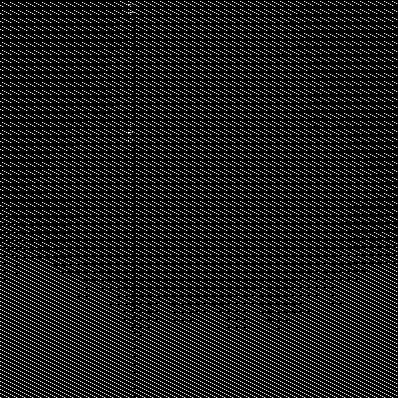

In [9]:
# 12(***) Dane są macierze: A, B0
# Dla macierzy B zdefiniowene jest równanie rekurencyjne: B n+1 = B n ∗ B n + A
# Dla −2 < a < 2 i −2 < b < 2 zmieniających się co 1/100 jesli det(B 100 ) < 2
# narysować czarny punkt o wspórzędnych (100*a, 100*b). Jesli powyższy wa-
# runek nie jest spełniony, narysować biały punkt o tych samych współrzęd-
# nych.
    
plot = np.empty((398,398))

for a in np.arange(-1.99, 2, 0.01):
    for b in np.arange(-1.99, 2, 0.01):
        A = np.matrix([[a, -b], [b, a]])
        B = np.matrix([[0, 0], [0, 0]])
        for i in range(0, 100):
            B = B * B + A
        if np.linalg.det(B) < 2:
            plot[int(100*a), int(100*b)] = 0
        else:
            plot[int(100*a), int(100*b)] = 1
            
img = Image.fromarray( plot , 'L')
img
#img.resize((512, 512))